## Image deconvolution
(Exercise 7.9 from *Computational Physics* by Mark Newman, [ISBN-10: 1480145513](https://www.amazon.ca/dp/1480145513/))


You've probably seen it on TV, in one of those crime drama shows.
They have a blurry photo of a crime scene and they click a few buttons on
the computer and magically the photo becomes sharp and clear, so you can
make out someone's face, or some lettering on a sign.  Surely (like almost
everything else on such TV shows) this is just science fiction?  Actually,
no.  It's not.  It's real and in this exercise you'll write a program that
does it.

When a photo is blurred each point on the photo gets smeared out
according to some "smearing distribution," which is technically called a
**point spread function**.  We can represent this smearing
mathematically as follows.  For simplicity let's assume we're working with
a black and white photograph, so that the picture can be represented by a
single function $a(x,y)$ which tells you the brightness at each
point $(x,y)$.  And let us denote the point spread function by $f(x,y)$.
This means that a single bright dot at the origin ends up appearing as
$f(x,y)$ instead.  If $f(x,y)$ is a broad function then the picture is
badly blurred.  If it is a narrow peak then the picture is relatively
sharp.

In general the brightness $b(x,y)$ of the blurred photo at point $(x,y)$ is
given by
$$
b(x,y) = \int_0^K dx' \int_0^Ldy'\  a(x',y')\ f(x-x',y-y')  ,
$$
where $K\times L$ is the dimension of the picture.  This equation is called
the **convolution** of the picture with the point spread
function.

Working with two-dimensional functions can get complicated, so to get the
idea of how the math works, let's switch temporarily to a one-dimensional
equivalent of our problem.  Once we work out the details in 1D we'll return
to the 2D version.  The one-dimensional version of the convolution above
would be
$$
b(x) = \int_0^L dx'\ a(x') f(x-x') .
$$
The function $b(x)$ can be represented by a Fourier series as in Eq. (7.5):
$$
b(x) = \sum_{k=-\infty}^\infty
         \tilde{b}_k \exp\biggl( i {2\pi k x\over L} \biggr),
$$
where
$$
\tilde{b}_k = {1\over L} \int_0^L dx\ b(x)
                         \exp\biggl( -i {2\pi k x\over L} \biggr)
$$
are the Fourier coefficients.  Substituting for $b(x)$ in this equation
gives
\begin{align*}
\tilde{b}_k &= {1\over L} \int_0^L dx' \int_0^L dx\ a(x') f(x-x')
                         \exp\biggl( -i {2\pi k x\over L} \biggr)
                         \\
            &= {1\over L} \int_0^L dx' \int_0^L dx a(x') f(x-x')
                         \exp\biggl( -i {2\pi k (x-x')\over L} \biggr)
                         \exp\biggl( -i {2\pi k x'\over L} \biggr).
\end{align*}
Now let us change variables to $X=x-x'$, and we get
$$
\tilde{b}_k = {1\over L} \int_0^L dx'\ a(x')
                         \exp\biggl( -i {2\pi k x'\over L} \biggr)
                         \int_{-x'}^{L-x'} dX\ f(X)
                         \exp\biggl( -i {2\pi k X\over L} \biggr).
$$
If we make $f(x)$ a periodic function in the standard fashion by repeating
it infinitely many times to the left and right of the interval from 0
to $L$, then the second integral above can be written as
\begin{align*}
\int_{-x'}^{L-x'}dX\  f(X) \exp\biggl( -i {2\pi k X\over L} \biggr) 
&= \int_{-x'}^0 dX\ f(X) \exp\biggl( -i {2\pi k X\over L} \biggr)
   \\
&\quad 
   + \int_0^{L-x'}dX\ f(X) \exp\biggl( -i {2\pi k X\over L}
   \biggr)  \\
& = \exp\biggl( i {2\pi k L\over L} \biggr)
   \int_{L-x'}^L dX\ f(X) \exp\biggl( -i {2\pi k X\over L} \biggr)
   \\
&\quad 
   + \int_0^{L-x'}dX\ f(X) \exp\biggl( -i {2\pi k X\over L} \biggr)
   \\
& = \int_0^L dX\ f(X)
                    \exp\biggl( -i {2\pi k X\over L} \biggr),
\end{align*}
which is simply $L$ times the Fourier transform $\tilde{f}_k$ of $f(x)$.
Substituting this result back into our equation for $\tilde{b}_k$ we then
get
$$
\tilde{b}_k = \int_0^L a(x') dx'\ 
              \exp\biggl( -i {2\pi k x'\over L} \biggr)
              \tilde{f}_k
            = L\,\tilde{a}_k\tilde{f}_k.
$$
In other words, apart from the factor of $L$, the Fourier transform of the
blurred photo is the product of the Fourier transforms of the unblurred
photo and the point spread function.

Now it is clear how we deblur our picture.  We take the blurred
picture and Fourier transform it to get $\tilde{b}_k =
L\,\tilde{a}_k\tilde{f}_k$.  We also take the point spread function and
Fourier transform it to get~$\tilde{f}_k$.  Then we divide one by the
other:
$$
{\tilde{b}_k\over L\tilde{f}_k} = \tilde{a}_k
$$
which gives us the Fourier transform of the *unblurred* picture.
Then, finally, we do an inverse Fourier transform on $\tilde{a}_k$ to get
back the unblurred picture.  This process of recovering the unblurred
picture from the blurred one, of reversing the convolution process, is
called **deconvolution**.

Real pictures are two-dimensional, but the mathematics follows through
exactly the same.  For a picture of dimensions $K\times L$ we find that the
two-dimensional Fourier transforms are related by
$$
\tilde{b}_{kl} =  KL\tilde{a}_{kl}\tilde{f}_{kl}\,,
$$
and again we just divide the blurred Fourier transform by the Fourier
transform of the point spread function to get the Fourier transform of the
unblurred picture.

In the digital realm of computers, pictures are not pure functions $f(x,y)$ but rather grids of samples, and our Fourier transforms are discrete
transforms not continuous ones.  But the math works out the same again.

The main complication with deblurring in practice is that we don't usually
know the point spread function.  Typically we have to experiment with
different ones until we find something that works.  For many cameras it's a
reasonable approximation to assume the point spread function is Gaussian:
$$
f(x,y) = \exp\biggl( -{x^2+y^2\over2\sigma^2} \biggr),
$$
where $\sigma$ is the width of the Gaussian.  Even with this assumption,
however, we still don't know the value of $\sigma$ and we may have to
experiment to find a value that works well.  In the following exercise, for
simplicity, we'll assume we know the value of $\sigma$.

In [2]:
# no need to change anything in this cell

%matplotlib inline
from math import pi
from scipy.integrate import odeint  # integrates a system of ODEs
import numpy as np
import matplotlib.pyplot as plt
# change some of the defaults for plots
plt.rcParams['text.usetex'] = True
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.figsize'] = [12,6]
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
from IPython.display import display, Markdown, Latex, Math, Pretty

a) On the web site you will find a file called `blur.txt` that
  contains a grid of values representing brightness on a black-and-white
  photo -- a badly out-of-focus one that has been deliberately blurred using
  a Gaussian point spread function of width $\sigma=25$.  Write a program
  that reads the grid of values into a two-dimensional array of real
  numbers and then draws the values on the screen of the computer as a
  density plot.  You should see the photo appear.  If you get something
  wrong it might be upside-down.  Work with the details of your program
  until you get it appearing correctly.  (Hint: The picture has the sky,
  which is bright, at the top and the ground, which is dark, at the
  bottom.)

[[672.56065 672.34187 672.13208 ... 673.27256 673.02586 672.7886 ]
 [682.04729 681.85582 681.67331 ... 682.67747 682.45793 682.24793]
 [691.51404 691.34926 691.19339 ... 692.06431 691.87135 691.688  ]
 ...
 [644.1248  643.82057 643.52537 ... 645.09204 644.76053 644.43811]
 [653.58515 653.30996 653.0438  ... 654.46568 654.16296 653.86946]
 [663.0685  662.8218  662.58412 ... 663.86389 663.58944 663.32434]]
1024
1024


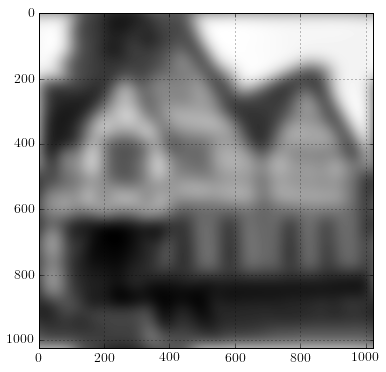

In [4]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt( 'blur.txt' )
img = np.array(data)

print(img)

print (len(img[0]))
print (len(img))

plt.imshow(img, cmap='gray')
plt.show()

<img src="http://www.science.uwaterloo.ca/~odonovan/2018W-phys239/psf.png" align=right width=200>


b) Write another program that creates an array, of the same size as the
  photo, containing a grid of samples from drawn from the Gaussian $f(x,y)$
  above with $\sigma=25$.  Make a density plot of these values on the
  screen too, so that you get a visualization of your point spread
  function.  Remember that the point spread function is periodic (along
  both axes), which means that the values for negative $x$ and $y$ are
  repeated at the end of the interval.  Since the Gaussian is centered on
  the origin, this means there should be bright patches in each of the four
  corners of your picture, something like this:
  
  

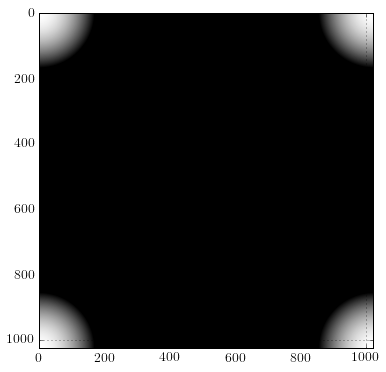

In [21]:
sig = 25

def gauss(x,y):
    return np.exp(-(x*x + y*y)/(2*sig*sig))

x,y = np.meshgrid(np.arange(1024),np.arange(1024))

f = gauss(x,y) + gauss(1024-x,y) + gauss(x,1024-y) + gauss(1024-x,1024-y)

plt.imshow(np.log10(f), cmap='gray',vmin = -10)





c)  Combine your two programs and add Fourier transforms using the
  functions `rfft2` and `irfft2` from `numpy.fft`, to make a
  program that does the following:

1. Reads in the blurred photo
2. Calculates the point spread function
3. Fourier transforms both
4. Divides one by the other
5. Performs an inverse transform to get the unblurred photo
6. Displays the unblurred photo on the screen

When you are done, you should be able to make out the scene in the photo, although probably it will still not be perfectly sharp.

Hint: One thing you'll need to deal with is what happens when the Fourier transform of the point spread function is zero, or close to zero.  In that case if you divide by it you'll get an error (because you can't divide by zero) or just a very large number (because you're dividing by something small).  A workable compromise is that if a value in the Fourier transform of the point spread function is smaller than a certain amount $\epsilon$ you don't divide by it -- just leave that coefficient alone.  The value of $\epsilon$ is not very critical but a reasonable value seems to be $10^{-3}$.
 

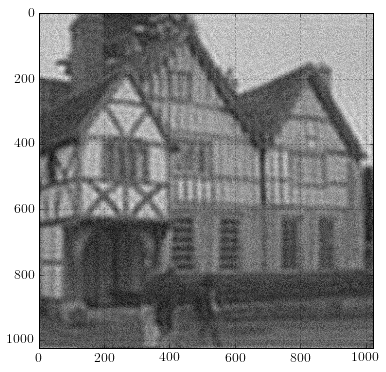

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import rfft2, irfft2

# making image
data = np.loadtxt( 'blur.txt' )
img = np.array(data)


# making point spread function
sig = 25

def gauss(x,y):
    return np.exp(-(x*x + y*y)/(2*sig*sig))

x,y = np.meshgrid(np.arange(1024),np.arange(1024))

psf = gauss(x,y) + gauss(1024-x,y) + gauss(x,1024-y) + gauss(1024-x,1024-y)

# fourier transforms

Img = rfft2(img)
Psf = rfft2(psf)

eps = 0.95e-4
Psf = Psf*(Psf > eps) + eps*(Psf <= eps)

Img = Img/Psf

img = irfft2(Img)

plt.imshow(img,cmap='gray')
plt.show()




d)  Bearing in mind this last point about zeros in the Fourier transform,
  what is it that limits our ability to deblur a photo?  Why can we not
  perfectly unblur any photo and make it completely sharp?

Ans: This is because the image has a limited dynamic range of colours

We have seen this process in action here for a normal snapshot, but it is
also used in many physics applications where one takes photos.  For
instance, it is used in astronomy to enhance photos taken by telescopes.
It was famously used with images from the Hubble Space Telescope
after it was realized that the telescope's main mirror had a serious
manufacturing flaw and was returning blurry photos -- scientists managed to
partially correct the blurring using Fourier transform techniques.